<a href="https://colab.research.google.com/github/Abh3201/Twitter-Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Twitter Sentiment Analysis using python

In [ ]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
#from google.colab import files
#uploaded = files.upload()
#Twitter API Keys
#consumerkey = "mkdtd72tGxBkgntVFMBxFsk"
consumetSecret = "INSERT_KEY"
accessToken = "INSERT_KEY"
accessTokenSecret = "INSERT_KEY"


In [ ]:
#Create an authentication object
authenticate = tweepy.OAuthHandler(consumerkey, consumetSecret)

#Set the acess token and acess token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create an API abject while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)



In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ElonMusk", count= 100, lang = "en", tweet_mode = "extended")

i = 1
#Print the last 5 tweets from the account
print("Show the 5 tweets: \n")
# posts
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + "\n")
  i += 1


Show the 5 tweets: 

1)@tesla_adri @WholeMarsBlog These things are best thought of as probabilities. There are 5 forward-facing cameras. It is highly likely that at least one of them will see multiple cars ahead.

2)@WholeMarsBlog Sensors are a bitstream and cameras have several orders of magnitude more bits/sec than radar (or lidar). 

Radar must meaningfully increase signal/noise of bitstream to be worth complexity of integrating it. 

As vision processing gets better, it just leaves radar far behind.

3)@WholeMarsBlog When radar and vision disagree, which one do you believe? Vision has much more precision, so better to double down on vision than do sensor fusion.

4)@WholeMarsBlog This is a major problem!

5)Just needs some legs



In [ ]:
for tweet in posts:
  print(str(i) + ')' + tweet.full_text + "\n")
  i += 1

6)@tesla_adri @WholeMarsBlog These things are best thought of as probabilities. There are 5 forward-facing cameras. It is highly likely that at least one of them will see multiple cars ahead.

7)@WholeMarsBlog Sensors are a bitstream and cameras have several orders of magnitude more bits/sec than radar (or lidar). 

Radar must meaningfully increase signal/noise of bitstream to be worth complexity of integrating it. 

As vision processing gets better, it just leaves radar far behind.

8)@WholeMarsBlog When radar and vision disagree, which one do you believe? Vision has much more precision, so better to double down on vision than do sensor fusion.

9)@WholeMarsBlog This is a major problem!

10)Just needs some legs

11)The Starship launch tower that catches the giant rocket booster is basically Mechazilla

12)But wait how is the core of the earth lit by the sun? Stop asking questions!!

13)Kong vs Godzilla has record for most meth ever consumed in a writer’s room

14)@itsALLrisky 💯

15)… 

In [ ]:
#Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,@tesla_adri @WholeMarsBlog These things are be...
1,@WholeMarsBlog Sensors are a bitstream and cam...
2,"@WholeMarsBlog When radar and vision disagree,..."
3,@WholeMarsBlog This is a major problem!
4,Just needs some legs


In [ ]:
#Clean the text

#Create a function to clean a text 
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+',"",text) # Removes @mention
  text = re.sub(r'#','',text) #Remove the hashtag Symbol
  text = re.sub(r'RT[\s]+','',text) #Remove ReTweet
  text = re.sub(r'https?:\/\/\s+','',text) #Remove hyperLink
  return text
#Cleaning the text 
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned Text
#del df['Polaruty']
df

,Tweets
0,_adri These things are best thought of as pro...
1,Sensors are a bitstream and cameras have seve...
2,"When radar and vision disagree, which one do ..."
3,This is a major problem!
4,Just needs some legs
5,The Starship launch tower that catches the gia...
6,But wait how is the core of the earth lit by t...
7,Kong vs Godzilla has record for most meth ever...
8,💯
9,… going to moon very soon


In [ ]:
#Creating a function to get a subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Creating a function to get a polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe
df

,Tweets,Subjectivity,Polarity
0,_adri These things are best thought of as pro...,0.425000,0.175000
1,Sensors are a bitstream and cameras have seve...,0.471429,0.214286
2,"When radar and vision disagree, which one do ...",0.322222,0.211111
3,This is a major problem!,0.500000,0.078125
4,Just needs some legs,0.000000,0.000000
5,The Starship launch tower that catches the gia...,1.000000,0.000000
6,But wait how is the core of the earth lit by t...,0.000000,0.000000
7,Kong vs Godzilla has record for most meth ever...,0.500000,0.500000
8,💯,0.000000,0.000000
9,… going to moon very soon,0.300000,0.200000


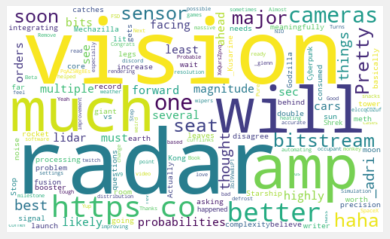

In [ ]:
#Plot the world Cloud
allWords = ' '.join([twts for twts in df['Tweets']] )
wordcloud = WordCloud(background_color='white',mode="RGB", width=500 , height=300,random_state = 21, max_font_size = 119).generate(allWords) 

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"
df['Analysis'] = df["Polarity"].apply(getAnalysis)

#Show Dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,_adri These things are best thought of as pro...,0.425000,0.175000,Positive
1,Sensors are a bitstream and cameras have seve...,0.471429,0.214286,Positive
2,"When radar and vision disagree, which one do ...",0.322222,0.211111,Positive
3,This is a major problem!,0.500000,0.078125,Positive
4,Just needs some legs,0.000000,0.000000,Neutral
5,The Starship launch tower that catches the gia...,1.000000,0.000000,Neutral
6,But wait how is the core of the earth lit by t...,0.000000,0.000000,Neutral
7,Kong vs Godzilla has record for most meth ever...,0.500000,0.500000,Positive
8,💯,0.000000,0.000000,Neutral
9,… going to moon very soon,0.300000,0.200000,Positive


In [ ]:
#Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=["Polarity"])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF["Analysis"][i] == 'Positive'):
    print(str(j)+") "+sortedDF["Tweets"][i])
    print()
    j = j+1

1) _adri  These things are best thought of as probabilities. There are 5 forward-facing cameras. It is highly likely that at least one of them will see multiple cars ahead.

2)  Sensors are a bitstream and cameras have several orders of magnitude more bits/sec than radar (or lidar). 

Radar must meaningfully increase signal/noise of bitstream to be worth complexity of integrating it. 

As vision processing gets better, it just leaves radar far behind.

3)  When radar and vision disagree, which one do you believe? Vision has much more precision, so better to double down on vision than do sensor fusion.

4)  This is a major problem!

5) Kong vs Godzilla has record for most meth ever consumed in a writer’s room

6) … going to moon very soon

7) _Kusarine  Actually happened to me in Cyberpunk haha

8)    Pretty much

9)  _  Good point. 

Next major software rev will do much better with automating wipers, seat heating &amp; defrost. 

Probable seat settings just based on occupant mass distr

In [ ]:
#Print the Negative tweets
j = 1
sortedDF = df.sort_values(by=["Polarity"], ascending='False')
for i in range(0,sortedDF.shape[0]):
  if (sortedDF["Analysis"][i] == 'Negative'):
    print(str(j)+") "+sortedDF["Tweets"][i])
    print()
    j = j+1

1)  Congrats to NIO. That is a tough milestone.

2)  Almost ready with FSD Beta V9.0. Step change improvement is massive, especially for weird corner cases &amp; bad weather. Pure vision, no radar.



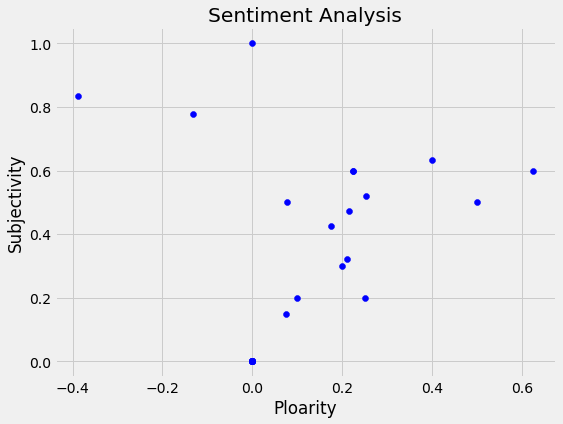

In [ ]:
#Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='blue')
plt.title("Sentiment Analysis")
plt.xlabel('Ploarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Tweets Last Month


In [ ]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)


46.7

In [ ]:
#Get the percentage of Negative tweets
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100,1)

6.7

In [ ]:
#Get the percentage of Neutral tweets
neutweets = df[df.Analysis == "Neutral"]
neutweets = neutweets['Tweets']

round((neutweets.shape[0]/df.shape[0])*100,1)

51.0

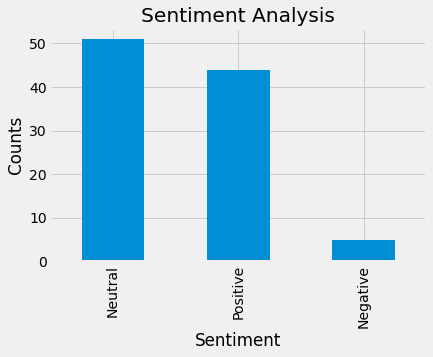

In [ ]:
#Show the value Counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind = "bar")
plt.show()